# Linear Regression - the first algorithm of AI

This Jupyter Notebook introduces you to:

* Using Python for machine learning
* Linear regression as an example of supervised learning
* How to create test data sets for exploring linear regression
* Fitting a straight line to the test data using:
 - Hand-crafted Gradient Descent
 - Functions built into the Python machine learning module `scikit-learn`
 - TensorFlow neural network
* How to visualize the data and the fitting processes

You will find these techniques useful as you explore machine learning.

## 0. Getting started...loading Python code modules

Python functionality is extended by pre-written code-modules that handle specific tasks. Most machine learning tasks in Python make use of at least the two libraries:

* `numpy` (for numerical operations on arrays and matricies)
* `matplotlib` (for visualizing your data and the fitted results).

You will often include the line **"%matplotlib inline"** after you load `matplotlib`. This is a special directive to the Jupyter Notebook to place the visualizations in your notebook and not pop open a separate window (or do something else).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Create test data sets for linear regression

When you first learn about linear regression in a machine learning course, you are provided with a dataset of $X$ and $y$ values in a file. You then move on from linear regression without trying out different kinds of datasets to get a feel for what works and what does not.

Python's `scikit-learn` module contains a routine called `make_regression` that allows you to create as many different lineare regression datasets as you want. A parameter called `noise` determines how well the dataset follows a straight line. You can set `bias` to a y-intercept ($b$). The function returns the value it chose for the slope ($m$) of the straight line being approximated.

You can learn more about each parameter and output of `make_regression` in the online docs:

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

In [2]:
n = 100
chosen_yint = -10.0
init_random_number = 100

from sklearn.datasets import make_regression
X, y, chosen_slope = make_regression(n_samples=n, n_features=1,
                                     bias=chosen_yint, noise=10.0,
                                     random_state=init_random_number,
                                     coef=True)

In [3]:
print("Number of data points to fit = ", n)
print("Chosen slope = ", chosen_slope)
print("Chosen y-intercept = ", chosen_yint)

Number of data points to fit =  100
Chosen slope =  40.28803313791421
Chosen y-intercept =  -10.0


### Watch the shapes of your data structures...sometimes they are not proper vectors

The cell below loads the `make regression` function and builds our first $(X, y)$ dataset. The function returns all the $X$ values in a Python column vector of dimension $(m\ x\ 1)$.

The $y$ values are returned in a Python array. Python arrays are not proper vectors - they are a list of items with no column dimension. Also, Python does not apply proper matrix math rules to arrays...so we need to reshape the $y$ array into a proper $(m\ x\ 1)$ vector by adding a column dimension:

In [4]:
print("X dimensions = ", X.shape, "\t(a proper column vector)")
print("y dimensions = ", y.shape, "\t(no column dimension because y is a Python array...)")
print("\n...adding a column dimension to y...\n")

y = y[:,None]

print("y dimensions = ", y.shape, " (...y is now a proper column vector ready for matrix math)")

X dimensions =  (100, 1) 	(a proper column vector)
y dimensions =  (100,) 	(no column dimension because y is a Python array...)

...adding a column dimension to y...

y dimensions =  (100, 1)  (...y is now a proper column vector ready for matrix math)


## 2. Always visualize your data - your eye is great at spotting trends and odd data points

The module `matplotlib` provides a lot of visualization functions similar to what you find in **Matlab** and **Octave**. The functions allow you to look at your data before and after fitting. There is no substitute for visual inspection to see if your data during fitting. Your eye can eailsy tell if a dataset can be fit by a straight line.

Plotting two column vectors of numbers is easy. You call the `scatter()` and then `show()` functions of `matplotlib`. Other calls let you add axis labels and a title.

Find out more about `matplotlib` here: https://matplotlib.org

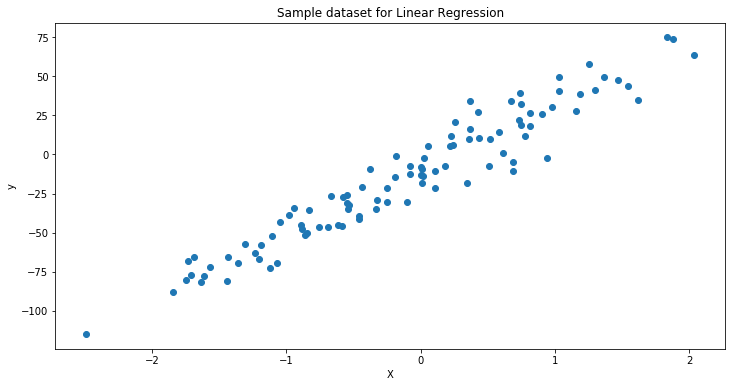

In [5]:
plt.rcParams['figure.figsize'] = [12.0,6.0]

plt.scatter(X, y)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Sample dataset for Linear Regression")

plt.show()

The data set does look like it can be approximated by a straight line. Before computers, you often just plotted the points on a piece of graph paper and drew the best straight line "by eye" use a pen and a ruler. Once you drew the line, you determined the slope and y-intercept from it with reference to the printed grid on the graph paper.

## 3. Linear Regression

Since our sample data points do not all sit nicely along a well defined line, we say that each observed point $\{(x_i,y_i),\ i = 0,\ ...,\ n - 1\}$ has some residual error term $\epsilon_i$ associated with it...and the precise equation relating each $y_i$ to each $x_i$ is:

$$y_i = mx_i + b + \epsilon_i$$

And the relationship between the true (but currently unknown) values of the slope $m$ and y-intercept $b$ is called the linear regression model. Once we know $m$ and $b$ we can predict the value of $y$ for any value of $x$. Since we have no guarantee that our data continues to follow a linear relationship outside our measured range of $x_i$ values, we usually restrict our predictions to values of $x$ between the minimum and maximum values of $x_i$.

In this case, once we fit our linear model, we should only predict values of $y$ for values of $x$ between:

In [6]:
print("Smallest value of x we should use when predicting y = ", min(X))
print("Largest value of x we should use when predicting y = ", max(X))

Smallest value of x we should use when predicting y =  [-2.48715154]
Largest value of x we should use when predicting y =  [2.03460756]


Our goal is to estimate the values of $m$ and $b$ that provide the "best" fit of our sample data. One way to do this is to minimize the residual error terms $\epsilon_i$:

$$\epsilon_i = (mx_i + b) - y_i$$

Because the residuals can be positive or negative, a simple approach to minimization is to make the sum of the squares of $\epsilon_i$ as small as possible:

$$J(m, b) = \frac{1}{2n}\sum_{i=0}^{n-1}\epsilon_i^2 = \frac{1}{2n}\sum_{i=0}^{n-1}((m*x_i+b)-y_i)^2$$

With the $1/(2n)$ is a normalization constant that is traditional (but you don't really need to include it when doing gradient descent). I've seen code for function minimzation that drop all such contants and compute only the sums. I've included it because you will see used it in a lot of machine learning courses.

### Did you know about the fight over who invented least squares?
 
This approach is known as "least squares". It was discovered independently by the legendary mathematicians [Carl Friedrich Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss) and [Adrien-Marie Legendre](https://en.wikipedia.org/wiki/Adrien-Marie_Legendre). Legendre published his results first in 1805. Gauss then claimed he had discovered it first in 1795 and had not bothered to tell anyone. This led to a "war of words" between the two mathematicians. Don Kopf wrote an article on it: https://priceonomics.com/the-discovery-of-statistical-regression/. Another good reference is Stephen M. Stigler's *The History of Statistics*: https://www.the-scientist.com/books-etc-/early-statistics-64227.

### And did you know there is an exact solution to linear regression?

There are equations for $m$ and $b$ that involve various products and sums of the data points $(x_i,y_i)$. You can find the details here: https://en.wikipedia.org/wiki/Simple_linear_regression.

Machine learning does not always involve a model that has an exact solution like Linear Regression. I'm going to show you the general approach to finding the best fit coefficients of any regression model - whether linear or otherwise. This approach invovles the least-squares *cost function* and solving for the slope and y-intercept using *gradient descent*.

## 4. Programming the Cost Function - from traditional loop to a single line of code

Python is a powerful language for numerical calculation. I'm going to show you how to calculate the cost function in one line of code. But let us start by calculating it using a traditional programmer's loop.

Before we can do that, we need to set initial values for the slope $m$ and y-intercept $b$:

In [7]:
slope = 1.0
yint = 1.0

Here's the loop calculation...

In [8]:
n = X.shape[0] # Get number of data points from the number of rows of the X vector

sumSq = 0.0
for i in range(n): # this means the loop runs from 0 to n - 1 (all vectors and arrays index from 0 in Python)
    sumSq = sumSq + ((slope*X[i,0] + yint) - y[i,0])**2
sumSq = sumSq / (2.0 * n)

print("Initial cost (loop method) = %f" % sumSq)

Initial cost (loop method) = 918.690864


Now let's program the cost again by exploiting the Python rules:

* A vector of size $(n\ x\ 1)$ multiplied by a single number results in a vector of the same size $(n\ x\ 1)$ with each element multiplied by the number
* A vector of size $(n\ x\ 1)$ with a single number added to it results in a vector of the same size $(n\ x\ 1)$ with each element having the number added to it
* Exponentiation of a vector of size $(n\ x\ 1)$ by a single number results in a vector of the same size $(n\ x\ 1)$ with each element raised to the power of that number

In [9]:
n = X.shape[0]
print("Number of data points n = ", n)
print("X vector shape: ", X.shape, " first element is: ", X[0,0])

Number of data points n =  100
X vector shape:  (100, 1)  first element is:  -0.37690335016897475


In [10]:
y_calc = (slope*X + yint) # X is a vector of size (m x 1) and so is y_hat
print("y_calc vector shape: ", y_calc.shape, " first element is: ", y_calc[0,0])

y_calc vector shape:  (100, 1)  first element is:  0.6230966498310253


In [11]:
y_diff = (y_calc - y) # differences between observed y values and y_hat (the residual errors)
print("y_diff vector shape: ", y_diff.shape, " first element is: ", y_diff[0,0])

y_diff vector shape:  (100, 1)  first element is:  10.128168448943457


In [12]:
y_diff_squares = ((slope*X + yint) - y)**2 # square each residual error in the vector
print("y_diff_squares vector shape: ", y_diff.shape, " first element is: ", y_diff_squares[0,0])

y_diff_squares vector shape:  (100, 1)  first element is:  102.57979613017372


In [13]:
sumSq2 = sum(y_diff_squares) / (2.0 * n) # Use the `sum` function to add all vector entries together
print("Initial cost (matrix math) = %f" % sumSq2)
print("Initial cost (loop method) = %f" % sumSq)

Initial cost (matrix math) = 918.690864
Initial cost (loop method) = 918.690864


Okay, the matrix approach matches the loop method. Now that you know the details, we can collapse the cost function code into one line:

In [14]:
def costFunction(X, y, slope, yint):
    cost = sum(((slope*X + yint) - y)**2) / (2.0 * X.shape[0])
    return cost

And this should give the same result for the initial cost function:

In [15]:
iCost = costFunction(X, y, slope, yint)
print("Initial cost (one-line function) = %f" % iCost)

Initial cost (one-line function) = 918.690864


### One last trick: Sum of squares using Matrix Algebra

Did you know that multiplying a column vector by its transpose is the same as summing the squares of each element? The transpose of a matrix flips its rows and columns. So a column vector of size $(n\ x\ 1)$ becomes a row vector of size $(1\ x\ n)$. Since matrix multiplication requires the number of columns of the first matrix to match the number of rows of the second matrix, if we multiply the $(1\ x\ n)$ traspose with the $(n\ x\ 1)$ vector, we get a $(1\ x\ 1)$ matrix that is the sum of the squares of the vector elements. This gives us one more way of writing the cost function:

In [16]:
y_diff = ((slope*X + yint) - y) # column vector of size (n x 1)
vCost = (y_diff.T @ y_diff)/(2.0 * X.shape[0]) # @ is the Python matrix multiplication operator
print("Initial cost (vector multiplication) = %f " % vCost)

Initial cost (vector multiplication) = 918.690864 


## 5. The equations of gradient descent

Gradient descent is an iterative optimization algorithm for finding the minimum of a function. The least squares cost function we defined has the nice property that it is a [convex function](https://en.wikipedia.org/wiki/Convex_function) and has only one minimum. When a function is not convex, gradient descent will find a *local minimum*. There may be more than one. You will find later that this problem comes up in fitting neural networks all the time because the functions you need to minimize are not always convex.

Gradient descents finds the minimum of a convex function by taking steps proportional to the negative of the gradient (or the calculated numerical gradient) of the function at the current point. If a function $F(\vec{x})$ is defined and differntiable around a specific point $\vec{x}_k$ then $F(\vec{x}_k)$ decreases fastest by moving in the direction defined by the negative of the gradient $-\nabla F(\vec{x}_k)$. So a small value of $F(\vec{x})$ will be obtained by moving from point $\vec{x}_k$ to $\vec{x}_{k+1}$ where:

$$\vec{x}_{k+1} = \vec{x}_k - \alpha\nabla F(\vec{x}_k)$$

and if $\alpha$ (known in machine learning as the **learning rate**) is small enough, the sequence of points generated by repeating the above equation a number of times, will converge to the global minimum of $F(\vec{x})$. In terms of our cost function:

$$J(m, b) = \frac{1}{2n}\sum_{i=0}^{n-1}\epsilon_i^2 = \frac{1}{2n}\sum_{i=0}^{n-1}((m*x_i+b)-y_i)^2$$

A simple gradient calculation yields equations for updating $m$ and $b$:

$$m_{k+1} = m_{k} - \alpha\frac{\partial J(m,b)}{\partial m}\Bigr|_{\substack{m\ =\ m_k\\b\ =\ b_k}} = m_{k} - \frac{1}{\alpha}\sum_{i=0}^{n-1}x_i*((m_k*x_i+b_k)-y_i)$$

$$b_{k+1} = b_{k} - \alpha\frac{\partial J(m,b)}{\partial m}\Bigr|_{\substack{m\ =\ m_k\\b\ =\ b_k}} = b_{k} - \frac{1}{\alpha}\sum_{i=0}^{n-1}((m_k*x_i+b_k)-y_i)$$

### Set your hyper-parameters

Every machine learning algorithm comes with one or more *hyper-parameters* that you must choose before fitting your data.

One parameter is the **number of iterations** the algorithm makes while fitting. A dataset very close to a straight line might take only a few iterations to converge on numbers for the slope and y-intercept. A dataset that looks more like a random cloud could take many more iterations to converge.

For gradient descent, you have the **alpha $(\alpha)$** hyper-parameter that determines how fast the algorithm moves towards the cost function minimum. Set **alpha** too large and the algorithm might not converge at all. Too small and it may take a lot more interations to converge. I'm choosing one that happens to work fairly well with gradient descent for linear regression:

In [17]:
iters = 1000
alpha = 0.05

### The gradient descent function to minize the cost function

Once you know the gradient descent equations, and that little bit of Python vector math knowledge, the function to minimze $J(m,b)$ is easy to write:

In [18]:
def gradientDescent(X, y, slope, yint, alpha, iters):
    n = X.shape[0]
    for i in range(iters):
        cost = costFunction(X, y, slope, yint)
        y_hat = (slope*X + yint)
        slope = slope - (alpha/n) * sum(X * (y_hat - y))
        yint = yint - (alpha/n) * sum(y_hat - y)
    return (slope, yint, cost)

And there is no reason to not just run it. We already know what the slope and intercept of our linear function should be. We determined the slope and y-intercept when we created the test data:

In [19]:
print("Chosen slope = ", chosen_slope)
print("Chosen y-intercept = ", chosen_yint)

Chosen slope =  40.28803313791421
Chosen y-intercept =  -10.0


So...does our gradient descent solution for Linear Regression work? We can find out with one line of code:

In [20]:
slope, yint, cost = gradientDescent(X, y, slope, yint, alpha, iters)

print("Initial cost and final cost = %f, %f" % (iCost, cost))
print()
print("slope and y-intercept = %f, %f" % (slope, yint))

Initial cost and final cost = 918.690864, 61.025557

slope and y-intercept = 40.638393, -10.289879


### Is this as good as we can do?

What if we repeat the minimization with twice as many iterations...

In [21]:
slope, yint, cost = gradientDescent(X, y, slope, yint, alpha, iters*2)

print("Initial cost and final cost = %f, %f" % (iCost, cost))
print()
print("slope and y-intercept = %f, %f" % (slope, yint))

Initial cost and final cost = 918.690864, 61.025557

slope and y-intercept = 40.638393, -10.289879


Yes, we have converged on the best slope and y-intercept!

**NOTE**: The values we obtained from gradient descent will be close to the slope and y-intercept chosen to create the test dataset. We introduced noise into our data and that reduces the ability for our numerical method to match the numbers used to create the dataset. If you set the `noise` parameter to zero in `make_regression` your numbers will be much closer.

## 6. Visualizing our fit

Plotting the test dataset and then drawing the "best fit" line in lets us see how well least squares Linear Regression works.

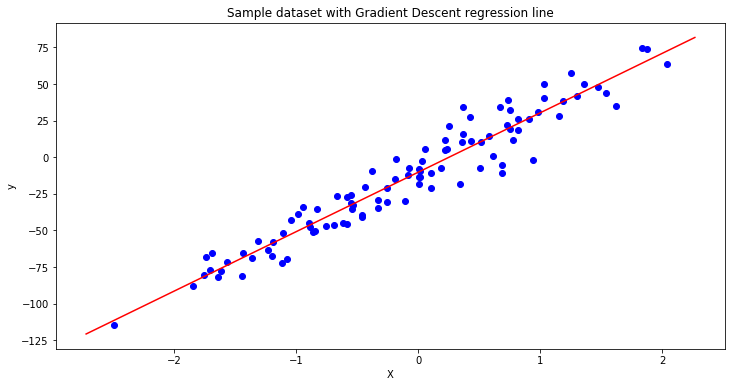

In [22]:
plt.scatter(X, y, c='b')

x_vals = np.array(plt.gca().get_xlim())[:,None]
y_vals = slope * x_vals + yint
plt.plot(x_vals, y_vals, 'r-')

plt.xlabel("X")
plt.ylabel("y")
plt.title("Sample dataset with Gradient Descent regression line")

plt.show()

### About those residual errors

Just to show you a little more about how to use `matplotlib`, I will draw in the residual errors in two ways. First, they can be added to the data plot above by calculating:

$$\epsilon_i = (mx_i + b) - y_i$$

for each point in the dataset and then drawing a vertical line from the actual data point to the fitted straight line. While you can do that a number of ways in Python, a loop is the easiest to understand:

In [23]:
y_predicted = slope*X + yint # The predicted values of y for each input value X in the dataset

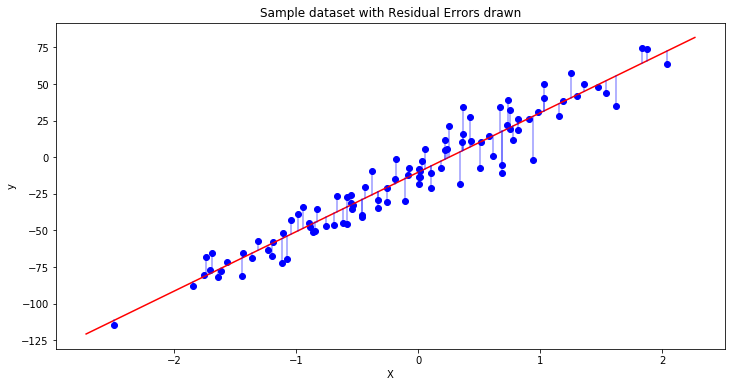

In [24]:
plt.scatter(X, y, c='b')
plt.plot(x_vals, y_vals, 'r-') # get the lowest and highest values of X and Y on the plotted axes
for i in range(X.shape[0]):
    plt.plot([X[i],X[i]], [y[i], y_predicted[i]], 'b-', alpha=0.4) # draw residual from the data point to the line
plt.xlabel("X")
plt.ylabel("y")
plt.title("Sample dataset with Residual Errors drawn")
plt.show()

The parameter `alpha` in `plt.plot` draws transparent lines varying from invisible `alpha=0.0` to solid `alpha=1.0`. Using an `alpha=0.4` allows you to add many smaller lines to a plot that will be visible but not overpowering.

### Another way to look the residuals

Draw each of them as a positive or negative value from zero:

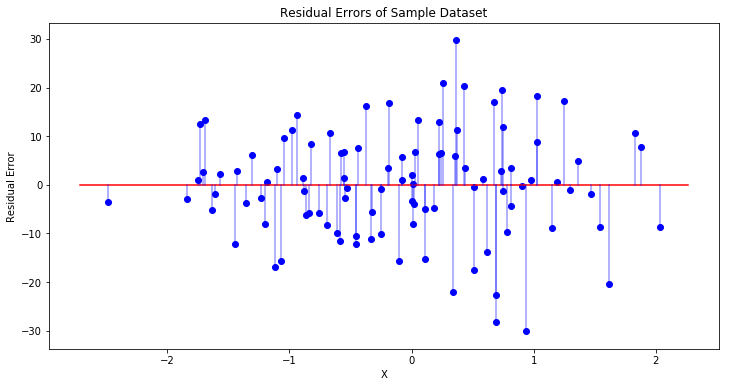

In [25]:
residuals = y - y_predicted

plt.plot(x_vals, [[0.0],[0.0]], 'r-')

for i in range(X.shape[0]):
    plt.plot([X[i],X[i]], [0.0,residuals[i]], 'b-', alpha=0.4)

plt.scatter(X, residuals, c='b')
plt.xlabel("X")
plt.ylabel("Residual Error")
plt.title("Residual Errors of Sample Dataset")
plt.show()

They look more or less evenly distributed about the horizontal axis. This is how it should be if your $X$ and $y$ data have a truly linear relationship. In that case, the residual errors will be *normally distributed* and follow a Gaussian distribution (Gauss discovered a lot of fundamental statistical concepts). This is a key concept of linear regression. If your math is a bit rusty, you can ignore this for now - or you can read all about it here: [Assumptions for Linear Regression](http://thestatsgeek.com/2013/08/07/assumptions-for-linear-regression/).

You can check if the residuals roughly follow a normal distribution by plotting them in a [histogram](http://asq.org/learn-about-quality/data-collection-analysis-tools/overview/histogram2.html) (another nice feature of `matplotlib`).

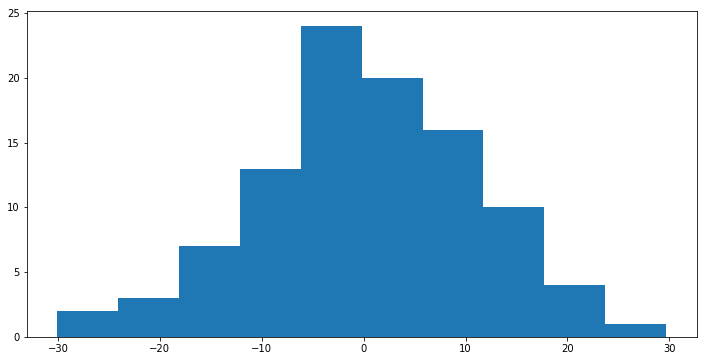

In [26]:
plt.hist(residuals)
plt.show()

Seriously, Statisics isn't that scary. Follow this link: [histogram](http://asq.org/learn-about-quality/data-collection-analysis-tools/overview/histogram2.html) to see if this histogram follows the *normal distribution*.

## 7. Fit the test data with the scikit-learn regression function

That was a bit of work. You think someone would have done all that programming for you? Well...they have. The `scikit-learn` Python module has linear regression built in as the `LinearRegression` function. Let's see if our results agree with the `LinearRegression` function:

In [27]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X, y)

print("slope and y-int (gradient descent) = %f, %f" % (slope, yint))
print("slope and y-int (scikit learn) = %f, %f" % (reg.coef_, reg.intercept_))
print("R^2 = %f" % reg.score(X, y))

slope and y-int (gradient descent) = 40.638393, -10.289879
slope and y-int (scikit learn) = 40.638393, -10.289879
R^2 = 0.927140


Nice and close. One other thing `LinearRegression` does is compute what is known as the $R^2$ coefficient. Your data follows the regression line perfectly if $R^2 = 1$ and is randomly distributed and not related to the line at all if $R^2 = 0$. In our case, our dataset is close to following a linear model $(R^2 = 0.92)$.

When we plot the lines calculated by gradient descent and the `LinearRegression` function, the lines overlay one another:

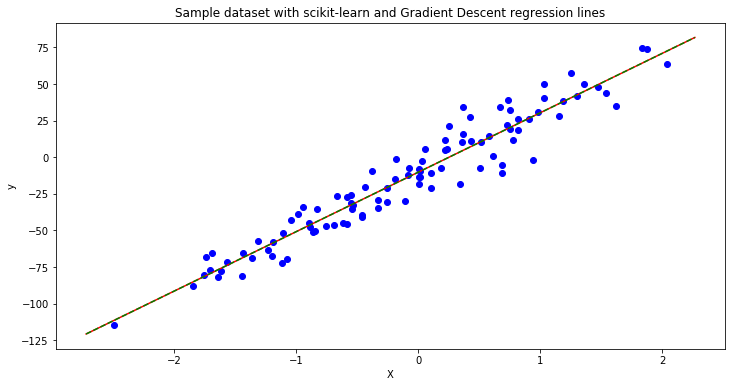

In [28]:
plt.scatter(X, y, c='b')

x_vals = np.array(plt.gca().get_xlim()) 
y_vals = reg.intercept_[0] + reg.coef_[0][0]* x_vals
y_v = slope* x_vals + yint


plt.plot(x_vals, y_vals, 'r-') # gradient descent line in red
plt.plot(x_vals, y_v, 'g--') # LinearRegression line in dotted green


plt.xlabel("X")
plt.ylabel("y")
plt.title("Sample dataset with scikit-learn and Gradient Descent regression lines")
plt.show()

## 8. One more time...with TensorFlow!

Remember in the article accompanying this Notebook that I said that Linear Regression is an idea at the heart of neural netorks? So it should not be too surprising that you can build a simple neural network to do Linear Regression. While it is too soon to be explaining `TensorFlow` to you, just take a look at the code:

In [29]:
import tensorflow as tf

np.random.seed(100)
tf.set_random_seed(100)

Define the slope, intercept, and the linear function to fit:

In [30]:
tf_slope = tf.Variable(1.0)
tf_yint = tf.Variable(1.0)
y_tf = tf_slope * X + tf_yint

The cost function is just the square of the residuals (without dividing by $2n$ to keep things simple):

In [31]:
loss = tf.reduce_mean(tf.square(y_tf - y))

Choose to fit the neural network using gradient descent...with the same $alpha$ parameter we used earlier...

In [32]:
optimizer = tf.train.GradientDescentOptimizer(alpha)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

And train the network using the same number of iterations...printing the slope and y-intercept every 100 iterations...

In [33]:
sess = tf.Session()
sess.run(init)

for step in range(iters):
    sess.run(train)
    if step % 100 == 0:
        print(step, sess.run(tf_slope), sess.run(tf_yint))

0 4.888285 -0.54188454
100 40.636253 -10.291174
200 40.638374 -10.289885
300 40.638374 -10.289885
400 40.638374 -10.289885
500 40.638374 -10.289885
600 40.638374 -10.289885
700 40.638374 -10.289885
800 40.638374 -10.289885
900 40.638374 -10.289885


How did `TensorFlow` do?

In [34]:
print("*** tensorflow linear regression:\tm = %f, b = %f" % (sess.run(tf_slope), sess.run(tf_yint)))
print("*** scikit-learn linear regression:\tm = %f, b = %f" % (reg.coef_, reg.intercept_))
print("*** gradient descent linear regression:\tm = %f, b = %f" % (slope, yint))

*** tensorflow linear regression:	m = 40.638374, b = -10.289885
*** scikit-learn linear regression:	m = 40.638393, b = -10.289879
*** gradient descent linear regression:	m = 40.638393, b = -10.289879


The same results!

### Plotting two figures side-by-site with Matplotlib

Let's plot the Gradient Descent and TensorFlow regression lines in two plots side-by-side. That is a great way to introduce you to plotting multiple figures using `matplotlib`.

First, update the plotting area so the diagrams look nicer (this is trial and error and subject to your personal taste). Here's what I chose:

In [35]:
plt.rcParams['figure.figsize'] = [15.0,4.0]

We're going to define a single graphical object called a `figure` and nest two `subplots` inside it. Note that the `add_subplot` routine takes $3$ arguments: (a) the number of rows in the figure, (b) the number of columns, and (c) where the particular subplot goes in that grid.

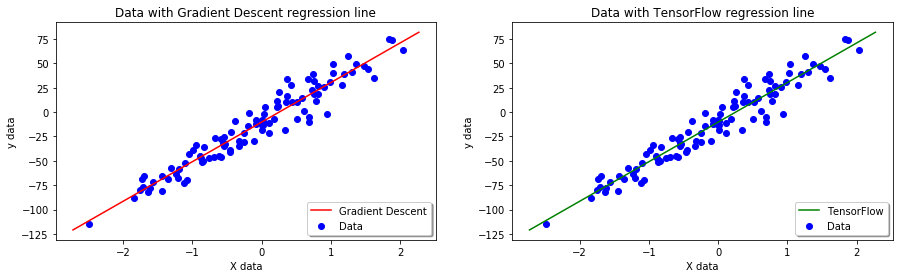

In [36]:
fig1 = plt.figure(1) # Define a figure object. Size is determined by the `plt.rcParams` setting in the cell above.
ax1 = fig1.add_subplot(1, 2, 1) # 1 row, 2 column figure with this subplot in position 1
ax2 = fig1.add_subplot(1, 2, 2) # 1 row, 2 column figure with this subplot in position 2

# Define subplot 1 using its "axes" object (ax1)

ax1.scatter(X, y, c='b', label='Data')

x_vals = np.array(ax1.get_xlim()) # NOTE: x limits will be set properly only after we draw the scatter plot...
y_vals = reg.intercept_[0] + reg.coef_[0][0]* x_vals
y_v = slope* x_vals + yint

ax1.plot(x_vals, y_vals, 'r-', label='Gradient Descent') # gradient descent line in red
ax1.set_xlabel("X data")
ax1.set_ylabel("y data")
ax1.set_title("Data with Gradient Descent regression line")
ax1.legend(loc='lower right', shadow=True)

# Define subplot 2 using its "axes" object (ax2)

ax2.scatter(X, y, c='b', label='Data')

x_vals = np.array(ax2.get_xlim()) 
y_vals = yint + slope* x_vals
y_v = sess.run(tf_slope)* x_vals + sess.run(tf_yint)

ax2.plot(x_vals, y_v, 'g-', label='TensorFlow') # TensorFlow line in dotted green

ax2.set_xlabel("X data")
ax2.set_ylabel("y data")
ax2.set_title("Data with TensorFlow regression line")
ax2.legend(loc='lower right', shadow=True)

# Draw the completed figure

plt.show()

## 9. Done

Congratulations! You now know a lot more than most people about Linear Regression, Cost Functions, Gradient Descent, and Python matrix and plotting tricks.

## References

Cite my work by pointing to the URL of this GitHub repository: 
> Ken Urquhart, Linear Regression - the first algorithm of AI, 2018
>
> https://github.com/KenU798/LinearRegression

My code is available under the [MIT License](https://github.com/KenU798/LinearRegression/blob/master/LICENSE). 

## Connect with me

* https://www.linkedin.com/in/kenurquhart
* https://github.com/KenU798/